# Classification

In [2]:
from holisticai.datasets import load_dataset
from holisticai.utils import BinaryClassificationProxy, concatenate_metrics
from holisticai.explainability.metrics import surrogate_metrics
from holisticai.utils.models.surrogate import SurrogateModel
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

feature_names = list(train['X'].columns)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

models = {}

model = RandomForestClassifier()
model.fit(train['X'], train['y'])
models["RandomForestClassifier"] = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

model = XGBClassifier()
model.fit(train['X'], train['y'])
models["XGBClassifier"] = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

model = LogisticRegression(solver='liblinear')
model.fit(train['X'], train['y'])
models["LogisticRegression"] = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

model = MLPClassifier()
model.fit(train['X'], train['y'])
models["MLPClassifier"] = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

/home/cristian/.local/share/hatch/env/virtual/holisticai/4NjQH6EQ/testing/lib/python3.11/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [4]:
from sklearn.metrics import accuracy_score

results = {}
surrogates = {}
for model_name,model in models.items():

    y_pred = model.predict(train['X'])
    acc = accuracy_score(train['y'], y_pred)
    surrogate = SurrogateModel(model, train['X'], model_type='shallow_tree')
    metrics = surrogate_metrics.classification_explainability_metrics(model, surrogate, train['X'], train['y'], metric_type="performance")
    metrics.at['Accuracy', 'Value'] = acc
    metrics.at['Accuracy', 'Reference'] = 1
    results[model_name] = metrics
    surrogates[model_name] = surrogate

concatenate_metrics(results)    

,RandomForestClassifier,XGBClassifier,LogisticRegression,MLPClassifier,Reference
Accuracy Difference,0.180100,0.101050,-0.000221,-0.51288,0.0
Surrogate Accuracy,0.819900,0.870426,0.982753,0.00000,1.0
Accuracy,0.999889,0.920840,0.795909,0.24356,1.0


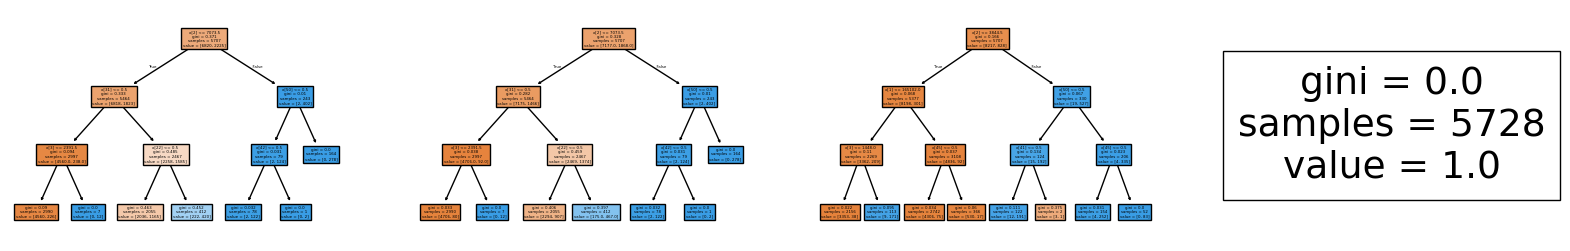

In [5]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,3))

for i,(model_name,surrogate) in enumerate(surrogates.items()):
    plt.subplot(1,len(surrogates),i+1)
    plt.title(model_name)
    _ = plot_tree(surrogate._surrogate, filled=True)

In [6]:
results = {}
surrogates = {}
for model_name,model in models.items():
    
    y_pred = model.predict(train['X'])
    acc = accuracy_score(train['y'], y_pred)

    surrogate = SurrogateModel(model, train['X'], model_type='tree')

    metrics = surrogate_metrics.classification_explainability_metrics(model, surrogate, train['X'], train['y'], metric_type="all")
    metrics.at['Accuracy', 'Value'] = acc
    metrics.at['Accuracy', 'Reference'] = 1

    results[model_name] = metrics
    surrogates[model_name] = surrogate

concatenate_metrics(results)    

,RandomForestClassifier,XGBClassifier,LogisticRegression,MLPClassifier,Reference
Accuracy Difference,0.068325,0.025428,0.000995,-0.51288,0.0
Surrogate Accuracy,0.931675,0.965285,0.994362,0.00000,1.0
Features Stability,0.865999,0.837077,0.661559,0.00000,1.0
Feature Importances Stability,0.992059,0.960263,0.996117,0.00000,1.0
Spread Divergence,0.302827,0.301043,0.115706,0.00000,0.0
Number of Features,81.000000,72.000000,50.000000,0.00000,1.0
Number of Rules,1672.000000,960.000000,201.000000,1.00000,1.0
Tree Depth Variance,86.971067,46.231732,37.388035,0.00000,0.0
Weighted Average Explainability Score,17.517391,13.574032,8.887609,0.00000,0.0
Weighted Average Depth,18.931652,14.589276,10.959162,0.00000,0.0


In [7]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))

for i,(model_name,surrogate) in enumerate(surrogates.items()):
    plt.subplot(1,len(surrogates),i+1)
    plt.title(model_name)
    _ = plot_tree(surrogate._surrogate, filled=True)